## importing necessary libraries

In [50]:
import pandas as pd   # for reading the csv file
import numpy as np     # for dea;ing with n-dimensional matrices
import matplotlib.pyplot as plt       # for plotting the results
from IPython.display import clear_output  
import time

In [51]:
dataset = pd.read_csv("datasets/housing.csv")
dataset.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Cleaning 
## 1. making sure that our data is icluding only those features which are having integer or float as datatype 
### we do so by using pandas' select_dtypes() method.

In [52]:
dataset=dataset.select_dtypes(include=('float64','int64'))  #this will remove the 'ocean_proximity' feature
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## 2. making sure that our data is not having any NaN value
### check which feature is having NaN values with pandas.isna() method

In [53]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [54]:
#so here we find that 203 rows are there that are having NaN value in "total_bedrooms" feature
# we will drop those rows by dropna() method with axis=0 i.e., row-wise.

print("Initially, dataset.shape : ",dataset.shape)
dataset=dataset.dropna(axis=0)
print("after dropping rows with Nan values, dataset.shape : ",dataset.shape)


Initially, dataset.shape :  (20640, 9)
after dropping rows with Nan values, dataset.shape :  (20433, 9)


## 3. Data Normalisation
## Here we are doing standard normalisation by subtraction data by mean and dividing it with standard deviation so that our data can be standardised with mean=0 and std=1

In [55]:
def scalar(x):
    return (x-np.mean(x))/np.std(x)


In [56]:
print("Before Normalisation: \n")
print("dataset.mean(): ",np.array(dataset.mean()))
print("dataset.std(): ",np.array(dataset.std()))

dataset =scalar(dataset)

print("\n After Normalisation: \n")
print("dataset.mean(): ",np.array(dataset.mean()))
print("dataset.std(): ",np.array(dataset.std()))

Before Normalisation: 

dataset.mean():  [-1.19570689e+02  3.56332213e+01  2.86330935e+01  2.63650423e+03
  5.37870553e+02  1.42494695e+03  4.99433465e+02  3.87116160e+00
  2.06864413e+05]
dataset.std():  [2.00357789e+00 2.13634767e+00 1.25918052e+01 2.18526957e+03
 4.21385070e+02 1.13320849e+03 3.82299226e+02 1.89929125e+00
 1.15435667e+05]

 After Normalisation: 

dataset.mean():  [-1.43267869e-12 -6.81218243e-14 -2.68875771e-15  2.88475693e-16
  2.03581639e-16 -1.88787631e-16  1.16914912e-16 -2.46833663e-14
 -1.86868254e-16]
dataset.std():  [1.00002447 1.00002447 1.00002447 1.00002447 1.00002447 1.00002447
 1.00002447 1.00002447 1.00002447]


## selecting the target_variable we want to predict

In [57]:
target=dataset['median_house_value']

# for univariate regression,
###                y=x*m + c
###               where x is our independent feature variable and y is our dependent variable
###               we are trying to fit a line between our x and y
###                         m is the slope of the line and c is the intercept we have on y axis.
###              here the y, i.e., target variable is the 'median_house_value'

In [58]:
def line(m,x,c):
    return m*x + c

###  In Regression, we will bw calculating the Mean Squared Error
###    error  = mean(  ( y_predicted - y_dataset ) ^2 )
#####  y_predicted will be calculated from our linear regression model.

In [59]:
def error(m,x,c,y):
    return np.mean((line(m,x,c)-y)**2)

## Improving the performance of our model

### We need to minimise the error in order to improve the performance of our model.
### In the Error Function(m,x,c,y) .... x and y are from the dataset, that's why there are constant and the only parameter  which decide the  value of error are....   m and c
### So basically error is a function of m and c and we know we need to minimise the error.  For this, we need to find the best possible values of m and c for which our error will be minimum.
### To find best values of m and c, We use Gradient Descent Algorithm.

In [60]:
# derivative of error function wrt to slope,m.
def derivative_wrt_m(m,x,c,y):
    return np.mean((line(m,x,c)-y)*x)

# derivative of error function wrt to intercept,c.
def derivative_wrt_c(m,x,c,y):
    return np.mean(line(m,x,c)-y)


def accuracy(m,x,c,y):
    currentError = error(m,feature,c,target)
    maxError = np.mean(target**2)
    return (1-(currentError / maxError))*100

## Feature Selection based on correlation

In [61]:
dataset.corr()['median_house_value'].drop('median_house_value',axis=0)

longitude            -0.045398
latitude             -0.144638
housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
Name: median_house_value, dtype: float64

In [62]:
# selecting "median_income" as our feature as it is having the maximum correlation with target "median_house_value" 
feature=dataset['median_income']

## setting initial values for slope and intercept 

In [67]:
# selecting initial values from standard normal distribution
m0=np.random.randn()
c0=np.random.randn()

##  training the model by gradient descent algorithm by updating the values of m and c in the direction of gradients, i.e., derivative wrt m and c respectively

0.5287749589582287
Initial Line in RED, Final Line In GREEN:  


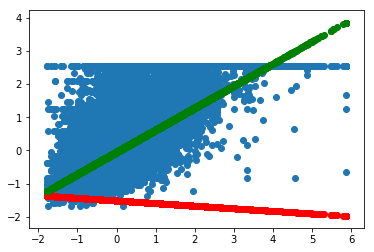

Text(0,0.5,'Error')

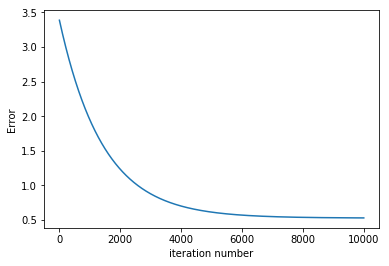

In [82]:
m=m0
c=c0
alpha=0.00035
#epsilon=0.00001
cost=[]

for i in range(10000):
    m=m-alpha*derivative_wrt_m(m,feature,c,target)
    c=c-alpha*derivative_wrt_c(m,feature,c,target)
    cost.append(error(m,feature,c,target))
    clear_output(True)
    print(cost[i])
    
print("Initial Line in RED, Final Line In GREEN:  ")
plt.scatter(feature,target)
plt.scatter(feature,line(m0,feature,c0),color='Red')
plt.scatter(feature,line(m,feature,c),color='green')
plt.show()
plt.plot(cost)
plt.xlabel("iteration number")
plt.ylabel("Error")




# orange is our linear regression model and blue is our actual dataset

Text(0,0.5,'SalePrice')

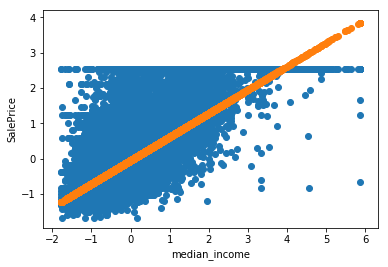

In [83]:
plt.scatter(feature,target)
plt.scatter(feature,line(m,feature,c))
plt.xlabel("median_income")
plt.ylabel("SalePrice")

In [84]:
print("Mean Squared Error is :", error(m,feature,c,target))

Mean Squared Error is : 0.5287749589582287
